# 

# <CENTER>COST OF LIVING

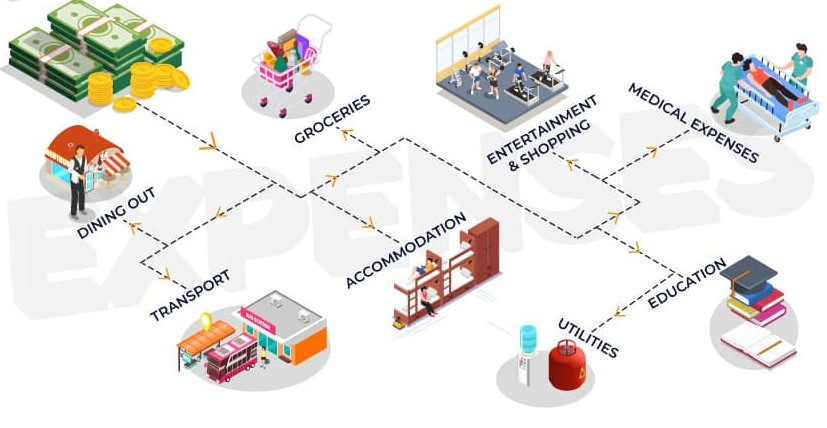

# 

### Cost of Living Index (Excl. Rent) is a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index does not include accommodation expenses such as rent or mortgage. If a city has a Cost of Living Index of 120, it means Numbeo has estimated it is 20% more expensive than New York (excluding rent).

# 

## importing librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR


In [2]:
lv=pd.read_csv('Cost_of_Living_Index_2022.csv')
lv

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [3]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [4]:
lv.shape

(139, 8)

In [5]:
lv.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


In [6]:
lv.isnull().mean()*100

Rank                              0.0
Country                           0.0
Cost of Living Index              0.0
Rent Index                        0.0
Cost of Living Plus Rent Index    0.0
Groceries Index                   0.0
Restaurant Price Index            0.0
Local Purchasing Power Index      0.0
dtype: float64

# <CENTER> EDA 

## Graphical visualisation

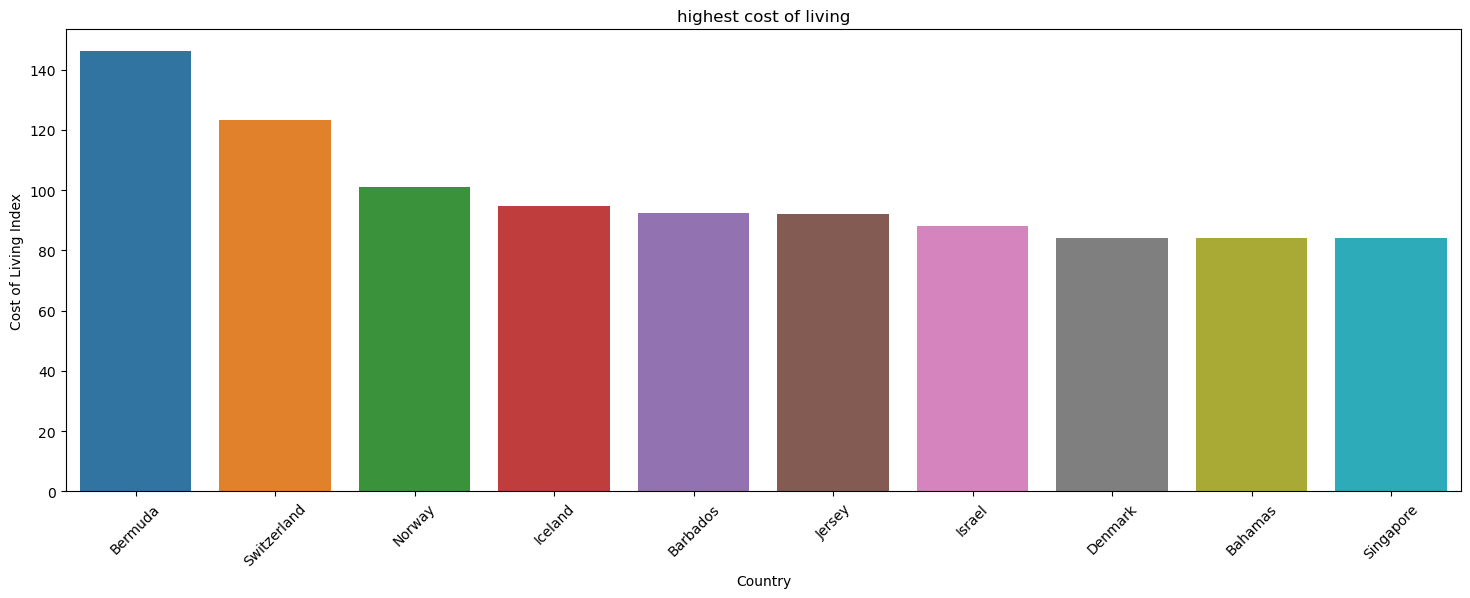

In [7]:
plt.figure(figsize=(18,6))
sns.barplot(x='Country',y='Cost of Living Index',data=lv.sort_values(by='Cost of Living Index',ascending=False)[:10]);
sns.set_style()
plt.title('highest cost of living')
plt.xticks(rotation=45)
plt.show()

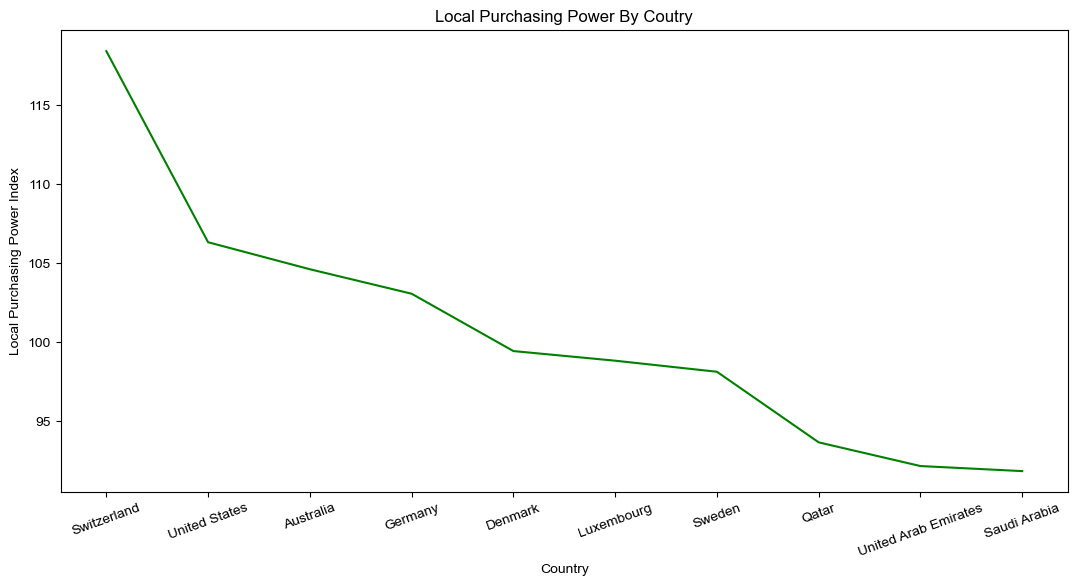

In [8]:
plt.figure(figsize=(13,6))
sns.lineplot(x='Country',y='Local Purchasing Power Index',data=lv.sort_values(by='Local Purchasing Power Index',ascending=False)[:10],color='green');
sns.set_style('ticks')
plt.title('Local Purchasing Power By Coutry')
plt.style.use('ggplot')
plt.xticks(rotation=20);

Text(0.5, 1.0, 'higest cost of Groceries')

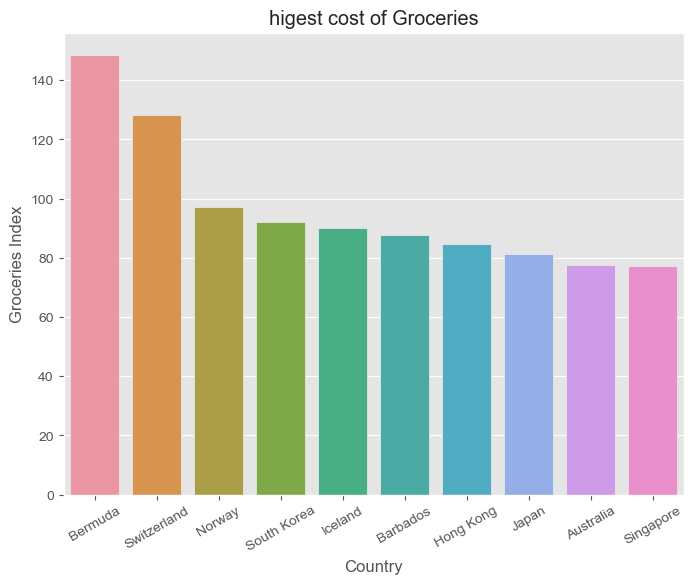

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x='Country',y='Groceries Index',data=lv.sort_values(by='Groceries Index',ascending=False)[:10])
plt.xticks(rotation=30)
plt.style.use('ggplot')
plt.title('higest cost of Groceries')

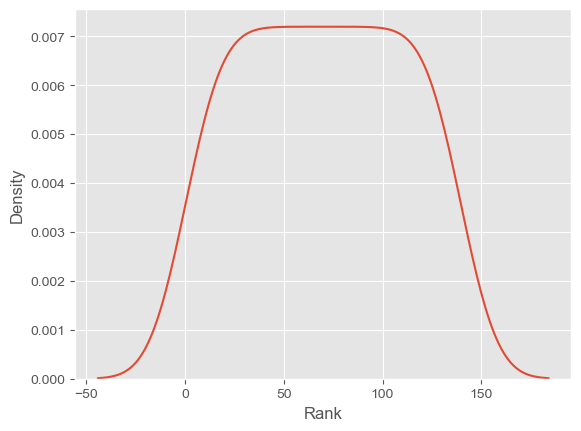

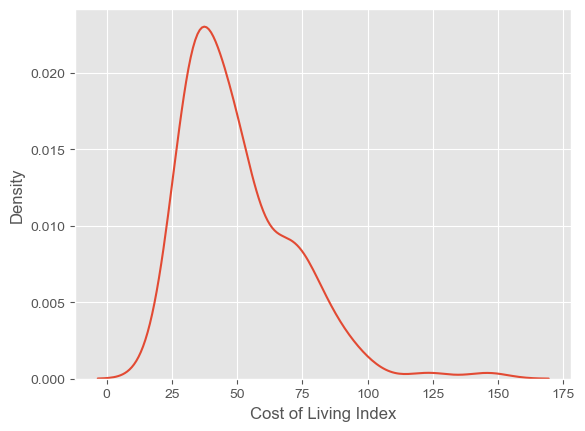

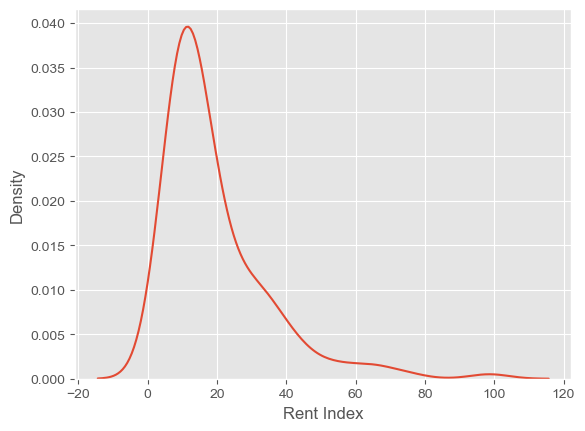

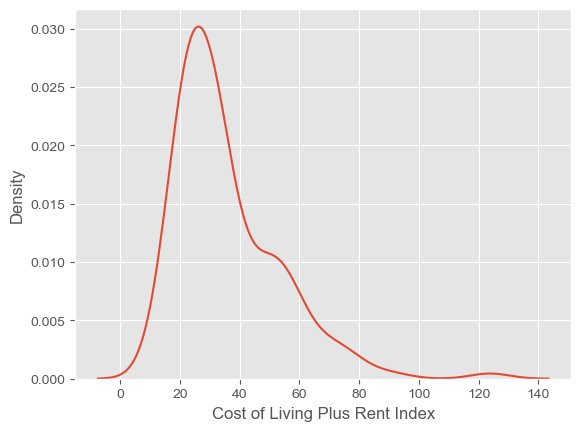

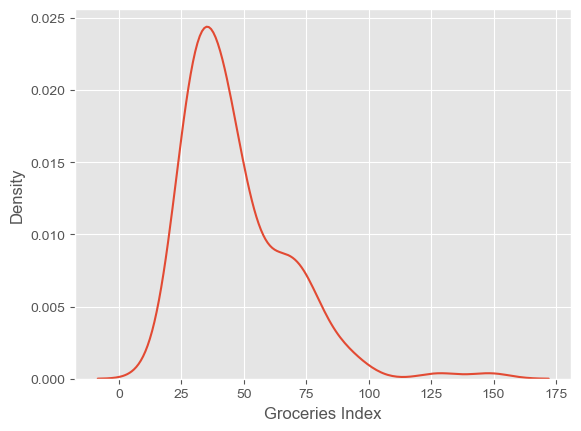

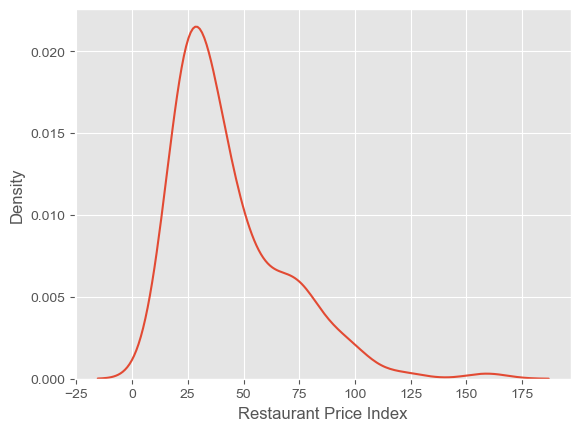

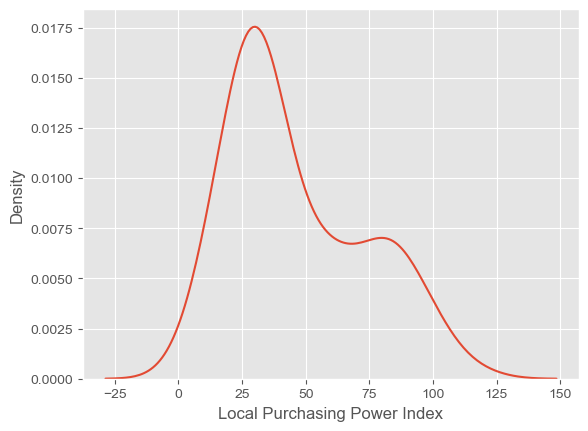

In [10]:
for i in lv.columns:
    if lv[i].dtype!='object':
        sns.kdeplot(lv[i])
        plt.show()

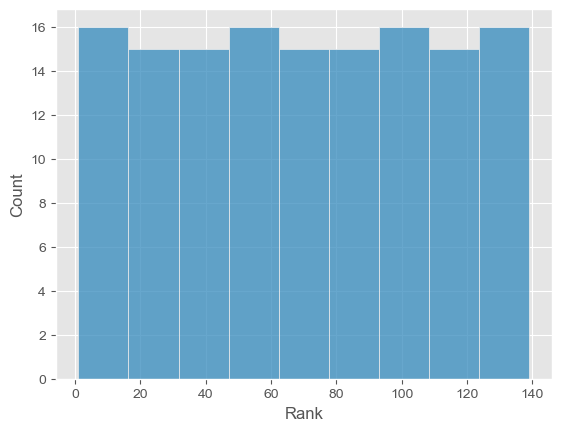

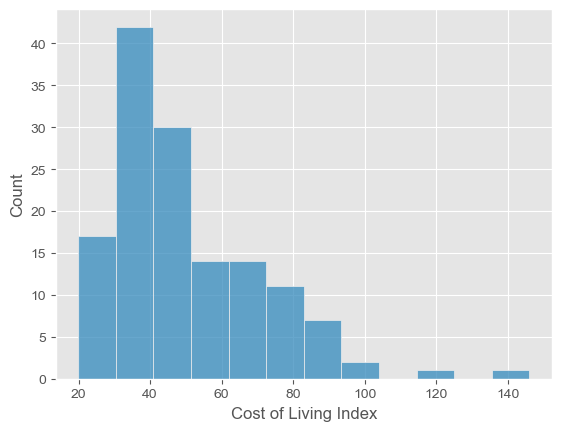

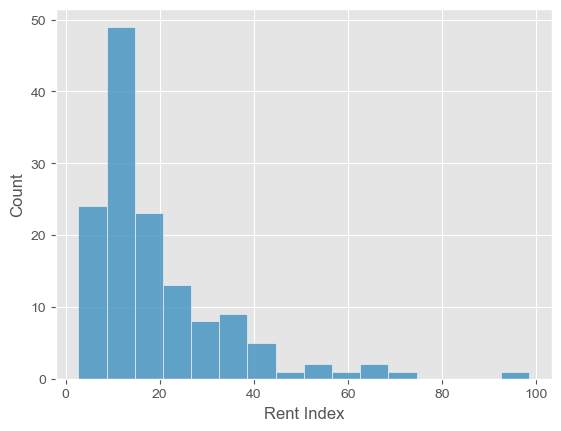

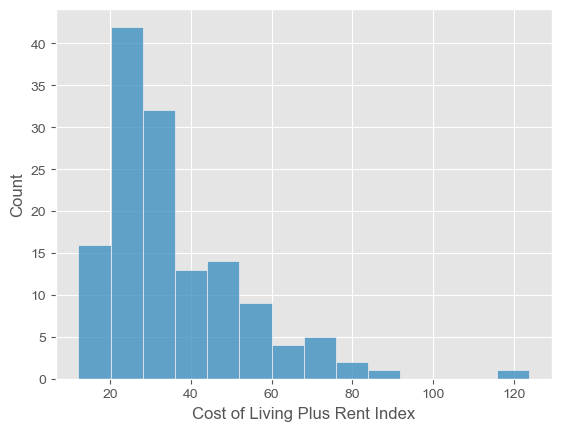

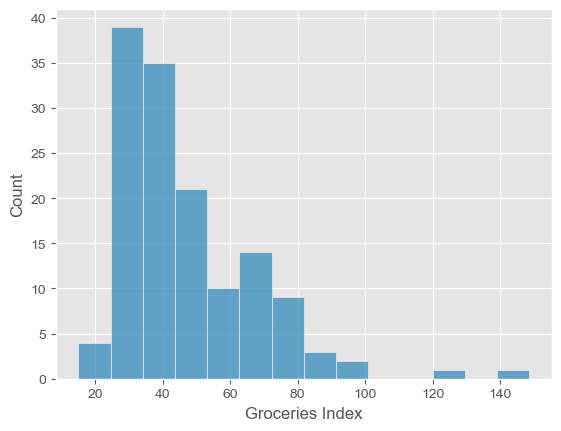

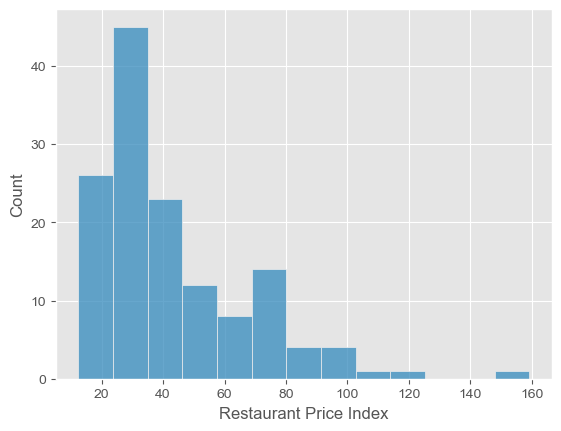

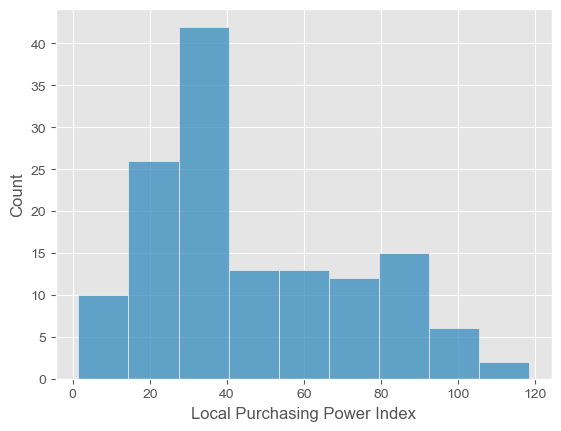

In [11]:
for i in lv.columns:
    if lv[i].dtype!='object':
        sns.histplot(lv[i])
        plt.show()

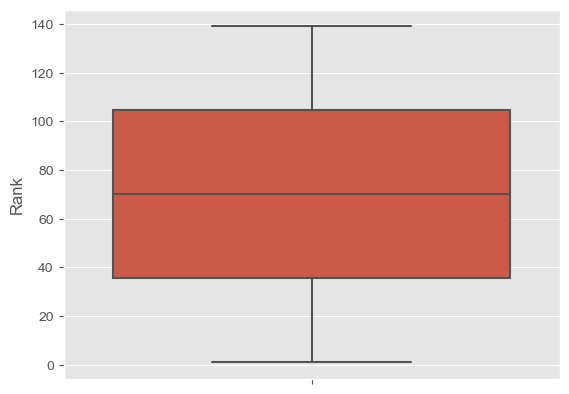

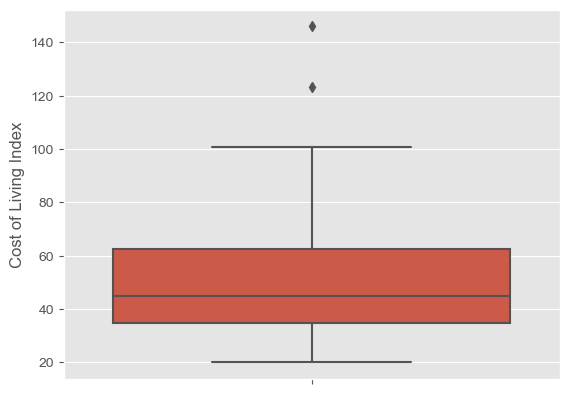

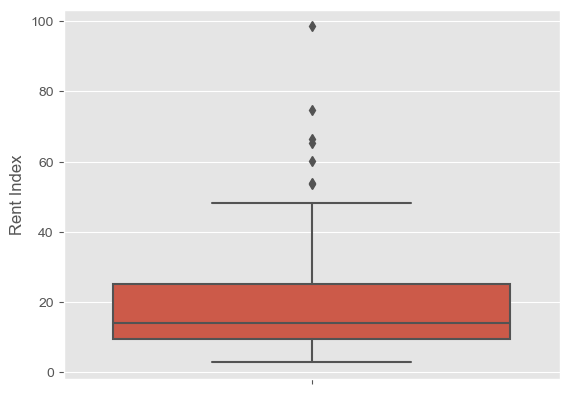

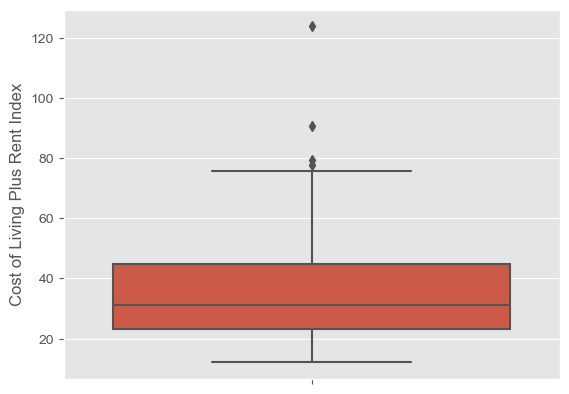

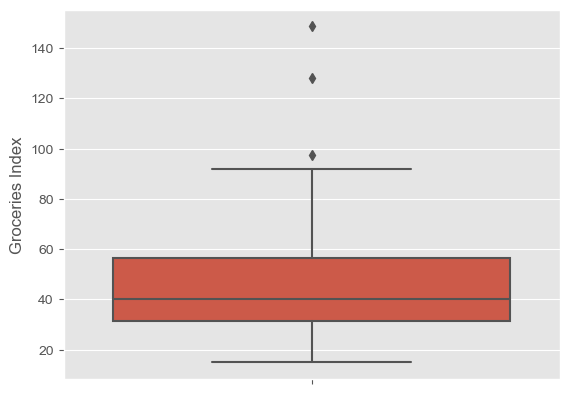

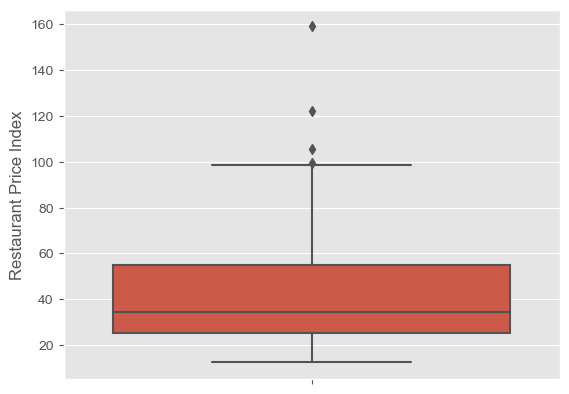

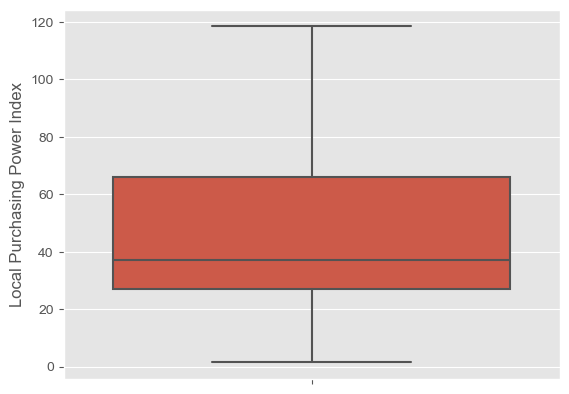

In [12]:
for i in lv.columns:
    if lv[i].dtype!='object':
        sns.boxplot(y=lv[i])
        plt.show()

In [13]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [14]:
for column in lv.columns:
    if lv[column].dtype!='object':
        UL,LL=outlier_limit(lv[column])
        lv[column]=np.where((lv[column]>UL)|(lv[column]<LL),np.nan,lv[column])

In [15]:
lv.isna().sum()

Rank                              0
Country                           0
Cost of Living Index              2
Rent Index                        7
Cost of Living Plus Rent Index    4
Groceries Index                   3
Restaurant Price Index            4
Local Purchasing Power Index      0
dtype: int64

In [16]:
lv.dropna(inplace=True)

In [17]:
lv.shape

(130, 8)

In [20]:
la=LabelEncoder()
lv['Country']=la.fit_transform(lv['Country'])

In [21]:
col=('Rank', 'Country','Cost of Living Index')


In [22]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            130 non-null    float64
 1   Country                         130 non-null    int64  
 2   Cost of Living Index            130 non-null    float64
 3   Rent Index                      130 non-null    float64
 4   Cost of Living Plus Rent Index  130 non-null    float64
 5   Groceries Index                 130 non-null    float64
 6   Restaurant Price Index          130 non-null    float64
 7   Local Purchasing Power Index    130 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.1 KB


<AxesSubplot:>

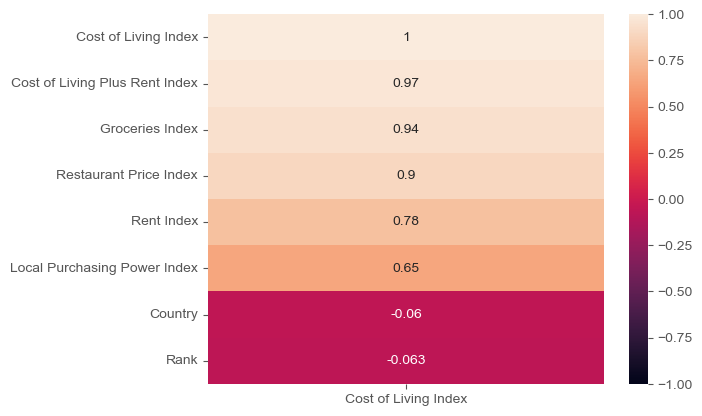

In [23]:
sns.heatmap(lv.corr()[["Cost of Living Index"]].sort_values(by="Cost of Living Index",ascending=False),vmin=-1,vmax=1,annot=True)

In [26]:
x=lv[['Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Rent Index']].values
y=lv[['Cost of Living Index']].values

In [27]:
rs=RobustScaler()

In [28]:
x=rs.fit_transform(x)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [31]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('training_score:', training_score)
    print('testing_score:',testing_score)
    print('score:',score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse:',rmse)
    print('-'*100)
    

model trained with LinearRegression
training_score: 99.99998218031423
testing_score: 99.99998057143208
score: 99.99998057143208
mae: 0.005926940480028893
mse: 5.1529010104686924e-05
rmse: 0.007178370992410947
----------------------------------------------------------------------------------------------------
model trained with Ridge
training_score: 99.31091611687313
testing_score: 99.47716509913728
score: 99.47716509913728
mae: 1.0103917079586175
mse: 1.3866778553432566
rmse: 1.177572866256376
----------------------------------------------------------------------------------------------------
model trained with LinearSVR
training_score: 97.7058362458864
testing_score: 98.80202074227236
score: 98.80202074227236
mae: 1.4286145103076722
mse: 3.177315257857364
rmse: 1.7825025267464178
----------------------------------------------------------------------------------------------------
model trained with DecisionTreeRegressor
training_score: 100.0
testing_score: 96.04546117937453
score: 96.0

In [40]:
model=Ridge()

In [41]:
model.fit(x_train,y_train)

Ridge()

In [42]:
y_pred=model.predict(x)

In [43]:
out=pd.DataFrame(zip(y,y_pred),columns=('actual','prediction'),dtype=float)

In [44]:
out

,actual,prediction
0,20.37,20.076694
1,35.50,34.489482
2,26.87,27.795432
3,34.69,34.741533
4,33.89,33.984671
...,...,...
125,43.20,43.831782
126,37.48,37.549445
127,53.14,54.104186
128,33.04,33.308601


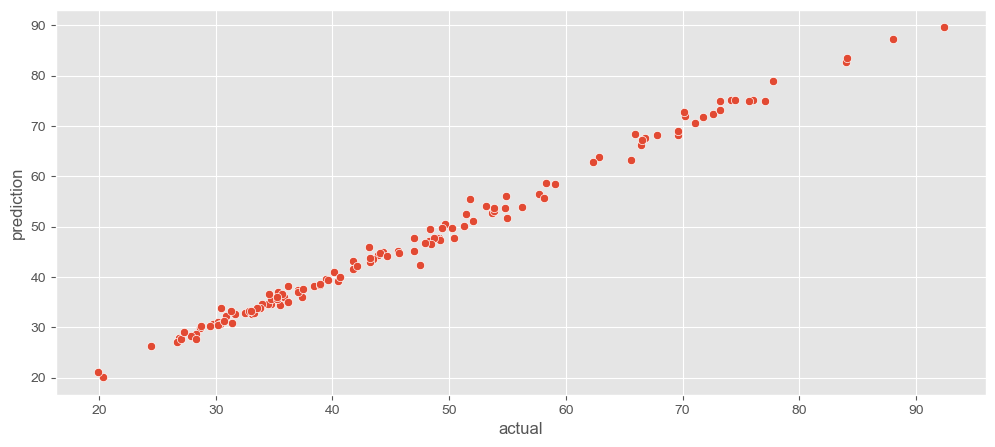

In [45]:
plt.figure(figsize=[12,5])
sns.scatterplot(data=out,x='actual',y='prediction')
plt.show()

In [46]:
model.score(x,y)

0.9934759169929419

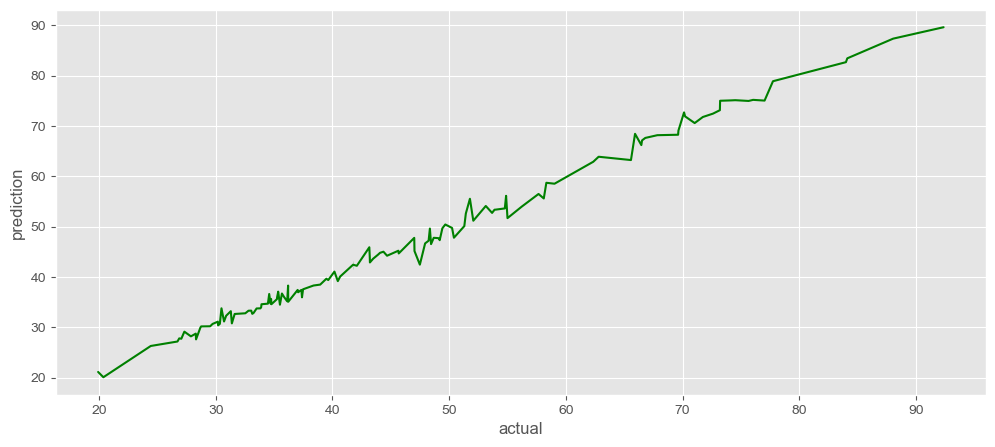

In [47]:
plt.figure(figsize=[12,5])
sns.lineplot(data=out,x='actual',y='prediction',color='green')
plt.show()